In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer


# read the file
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
#Collecting null places
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
#Showing unique values
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

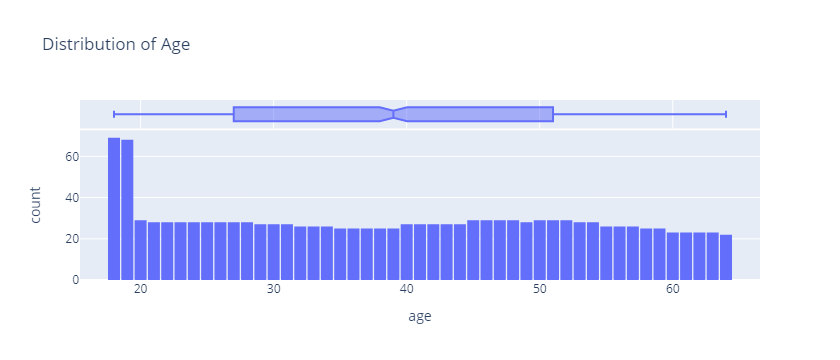

In [65]:
fig = px.histogram(insurance, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

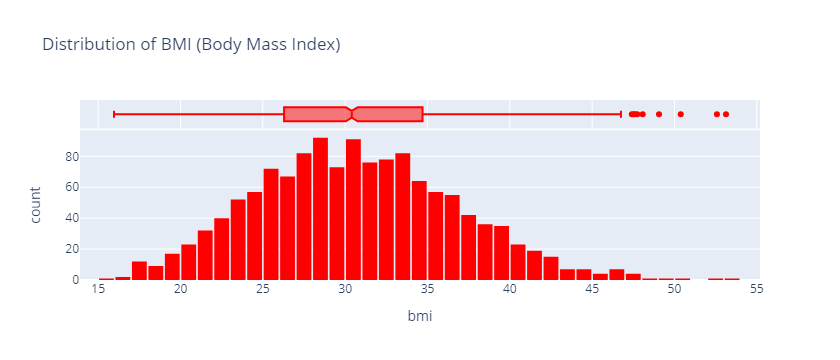

In [66]:
fig = px.histogram(insurance, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

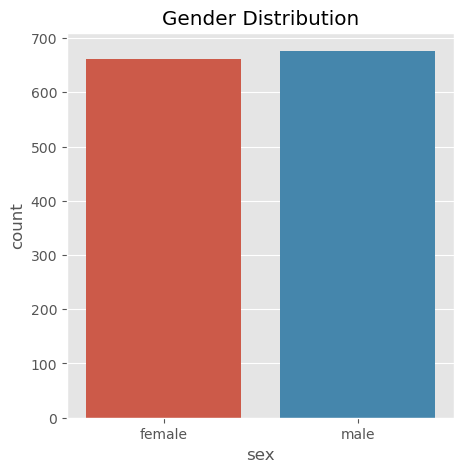

In [67]:
#Gender CountPlot
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=insurance)
plt.title('Gender Distribution')
plt.show()

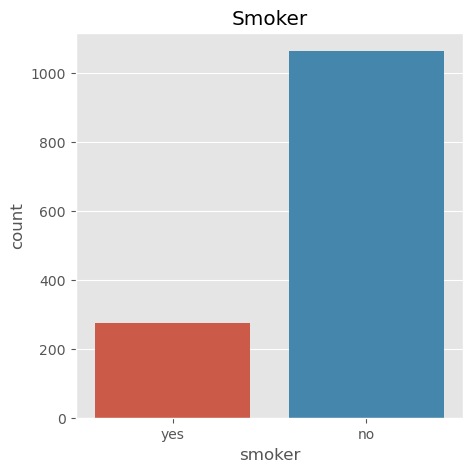

In [68]:
#Smoker CountPlot
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance)
plt.title('Smoker')
plt.show()

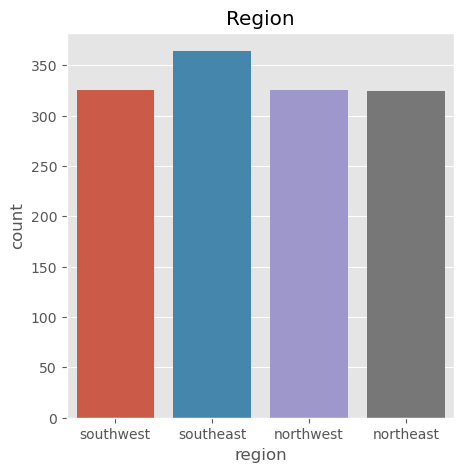

In [69]:
#Region CountPlot
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance)
plt.title('Region')
plt.show()

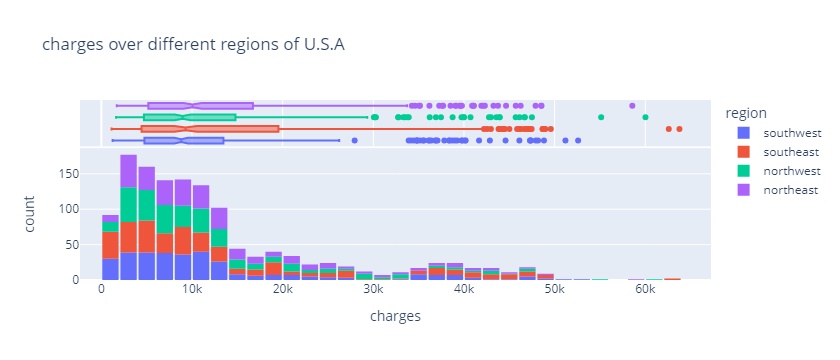

In [70]:
#Region Vs Charges BarPlot
fig = px.histogram(insurance,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

Text(0.5, 1.0, 'Charges for Gender_Smokers')

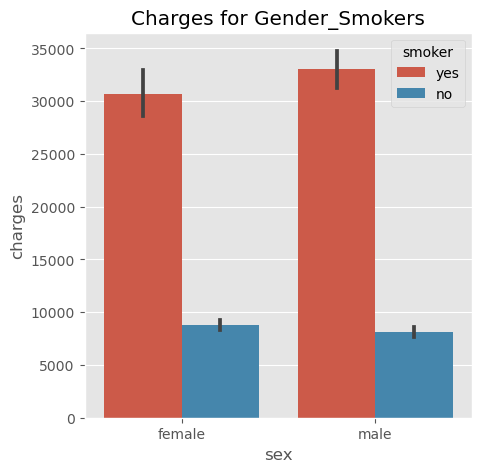

In [71]:
#Charges for gender smoker barPlot
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=insurance)
plt.title('Charges for Gender_Smokers')

<Axes: xlabel='region', ylabel='charges'>

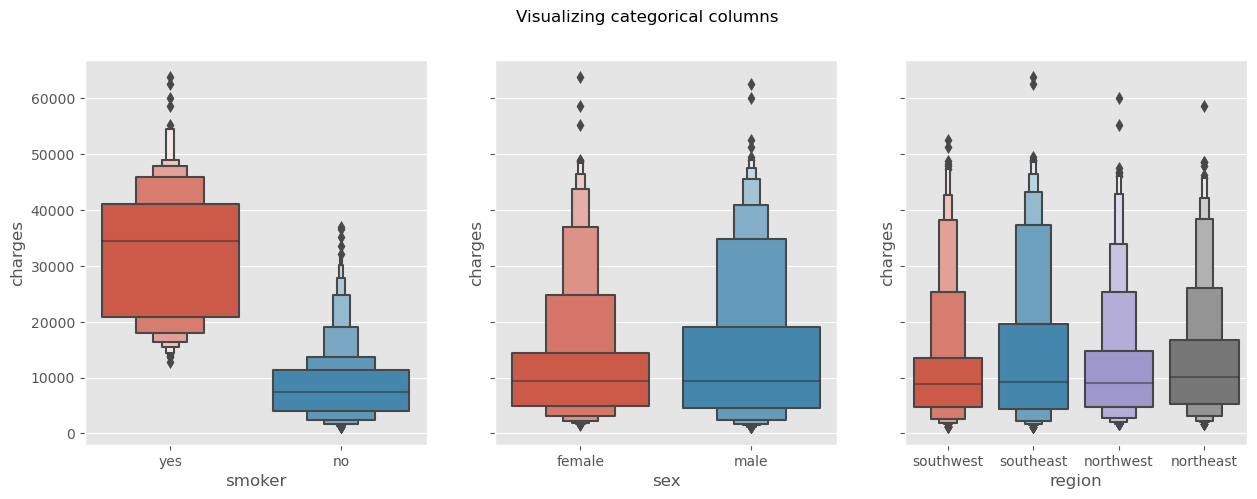

In [72]:
#Charges Vs Gender,Smoker,Region boxenplot
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=insurance, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=insurance, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=insurance, ax=axes[2])

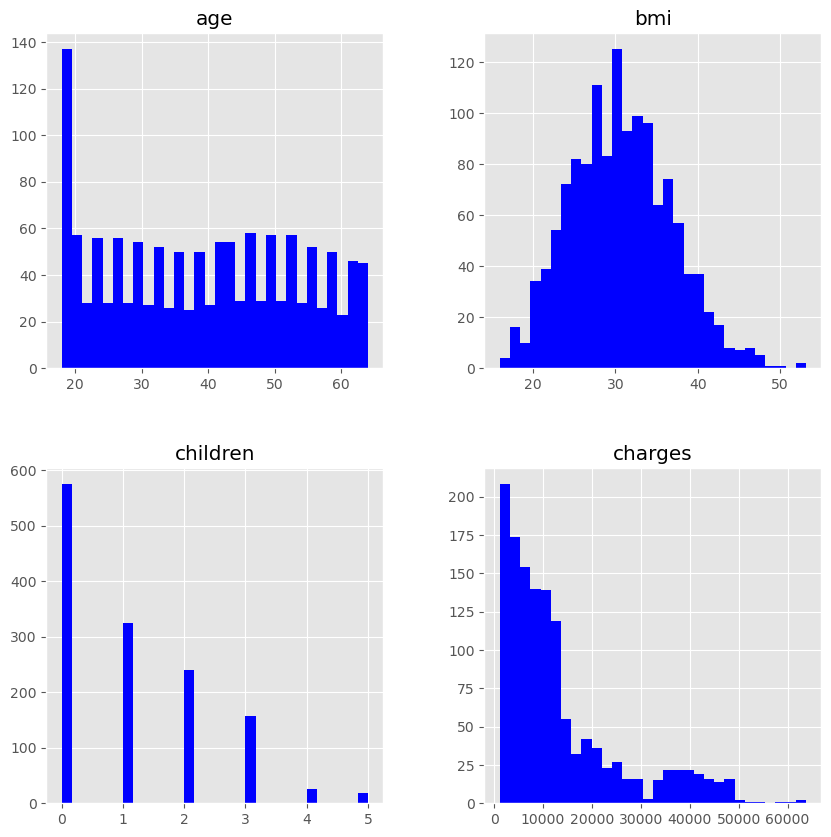

In [73]:
#Data Histing
insurance[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [74]:
sns.heatmap(insurance.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

ValueError: could not convert string to float: 'female'

In [ ]:
# regression algorithms works on features represented as numbers only
# converting string values to numbers (Mapping of Data)
insurance['sex'] = insurance['sex'].apply({'male':0, 'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

insurance.head()

In [ ]:
insurance.columns

In [ ]:
# Prepairing Data
# determine the features
X = insurance[['age','sex','bmi','children','smoker','region']]

# determine the predicted variable
y = insurance['charges']

# normalize values
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# X.head()
# y.head()

# splitting train and test data
# 30 % will be used in testing and the rest for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# len(X_test)
# len(X_train)

model = LinearRegression()

# fitting the linear model by passing the training dataset
model.fit(X_train, y_train)

# predicting the target variable "charges" for test dataset
predictions = model.predict(X_test)

# predictions[0:10]

# compare the prediction values with actual results by plotting
plt.scatter(y_test, predictions)
plt.xlabel('test_charges')
plt.ylabel('predicted_charges')



In [ ]:
# here is the data of a new patient to predict its charges
data = {'age': 24, 'sex': 1, 'bmi': 23.50, 'children' : 0, 'smoker' : 0, 'region' : 3}  
index = [1]
new_patient = pd.DataFrame(data, index)
new_patient

In [ ]:
# calculate the mean square error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# make prediction for a new patient charges
new_patient_prediction = model.predict(new_patient)
print("The new patient charges will be : ",new_patient_prediction)